<a href="https://colab.research.google.com/github/priyanka4678/Assignment_on_python_for_DSA/blob/main/Priyanka_Kumari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and Reading the dataset

In [2]:
data=pd.read_csv('/content/car_age_price.csv')

In [23]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


### Basic information about dataset

In [4]:
data.shape

(112, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [13]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [100]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


### Graphical representation that shows relation between Year and price

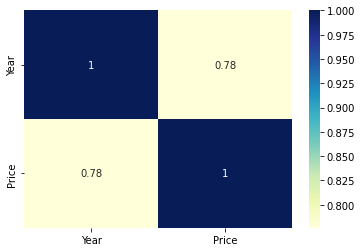

In [6]:
corr_matrix=data.corr()
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')

In [7]:
data.columns

Index(['Year', 'Price'], dtype='object')

### Taking Price as target variable

In [91]:
y=data['Price']
x=data.drop(['Year'],axis=1)

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [94]:
x_train

,Price
81,390000
77,325000
15,500000
30,650000
45,450000
...,...
106,300000
14,475000
92,520000
51,550000


In [95]:
y_train

81     390000
77     325000
15     500000
30     650000
45     450000
        ...  
106    300000
14     475000
92     520000
51     550000
102    350000
Name: Price, Length: 84, dtype: int64

In [96]:
x_test

,Price
40,525000
65,495000
4,465000
47,450000
42,550000
69,300000
26,550000
11,500000
10,500000
44,550000


In [97]:
y_test

40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
66     525000
90     520000
62     540000
22     434999
85     320000
Name: Price, dtype: int64

In [98]:
x_test.shape

(28, 1)

### Linear Regression

In [93]:
from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression()
model=linear_regression.fit(x_train,y_train)
predictions=model.predict(x_test)

In [90]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE=:',mean_squared_error(y_test,predictions))
print('R squared Value=',r2_score(y_test,predictions))

MSE=: 7.26028240503686e-22
R squared Value= 1.0


### Lasso Regression

In [75]:
from sklearn.linear_model import Lasso

In [80]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train) 
pred_train_lasso= model_lasso.predict(x_train)
print('MSE is:',np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print('R Square Error is:',r2_score(y_train, pred_train_lasso))

MSE is: 1.0726404841463115e-07
R Square Error is: 1.0


In [79]:
pred_test_lasso= model_lasso.predict(x_test)
print('MSE is:',np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print('R squared error is:',r2_score(y_test, pred_test_lasso))

MSE is: 9.566889479636598e-08
R squared error is: 1.0
